**Data Mining CSCE $566$ FINAL PROJECT --BY MEGHNA GHOSAL (C00578525) AND ABINA JOSHI (C00580091)**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [62]:
file_path = '/Users/meghnaghosal/Downloads/clinical_notes.csv' 
glaucoma_data = pd.read_csv(file_path)

In [63]:
print (glaucoma_data)

print("First few records from the dataset:")
print(glaucoma_data.head())

# Displaying information about the data set
print("\nDataset Information:")
print(glaucoma_data.info())

# Displaying statistics column-wise
print("\nStatistical Overview (Numerical Columns):")
print(glaucoma_data.describe())

        age  gender   race     ethnicity language         maritalstatus  \
0     56.56  female  black  non-hispanic  english                single   
1     53.91  female  white  non-hispanic  english                single   
2     46.30  female  white  non-hispanic  english                single   
3     66.52    male  white  non-hispanic  english                single   
4     82.52  female  black  non-hispanic  english              divorced   
...     ...     ...    ...           ...      ...                   ...   
9995  84.71  female  white  non-hispanic  english  married or partnered   
9996  40.32    male  white  non-hispanic  english  married or partnered   
9997  57.58    male  black  non-hispanic  english  married or partnered   
9998  73.03  female  white  non-hispanic  english  married or partnered   
9999  50.01  female  white  non-hispanic  english                single   

                                                   note  \
0     ms. PERSON is a 56 yo woman presen

In [64]:
# count of missing values for each column
print("\nMissing Values:")
print(glaucoma_data.isnull().sum())


Missing Values:
age              0
gender           0
race             0
ethnicity        0
language         0
maritalstatus    0
note             0
gpt4_summary     0
glaucoma         0
use              0
dtype: int64


In [66]:
glaucoma_data.drop_duplicates(inplace=True)

# Fill missing values in critical columns
glaucoma_data['note'] = glaucoma_data['note'].fillna("Missing note")
glaucoma_data['race'] = glaucoma_data['race'].fillna("Unknown")
glaucoma_data['glaucoma'] = glaucoma_data['glaucoma'].fillna("no")


In [67]:
print(glaucoma_data)

        age  gender   race     ethnicity language         maritalstatus  \
0     56.56  female  black  non-hispanic  english                single   
1     53.91  female  white  non-hispanic  english                single   
2     46.30  female  white  non-hispanic  english                single   
3     66.52    male  white  non-hispanic  english                single   
4     82.52  female  black  non-hispanic  english              divorced   
...     ...     ...    ...           ...      ...                   ...   
9995  84.71  female  white  non-hispanic  english  married or partnered   
9996  40.32    male  white  non-hispanic  english  married or partnered   
9997  57.58    male  black  non-hispanic  english  married or partnered   
9998  73.03  female  white  non-hispanic  english  married or partnered   
9999  50.01  female  white  non-hispanic  english                single   

                                                   note  \
0     ms. PERSON is a 56 yo woman presen

In [68]:
# Standardize race categories
glaucoma_data['race'] = glaucoma_data['race'].str.lower().str.strip()
glaucoma_data = glaucoma_data[glaucoma_data['race'].isin(['asian', 'black', 'white'])]

In [69]:
print(glaucoma_data)

        age  gender   race     ethnicity language         maritalstatus  \
0     56.56  female  black  non-hispanic  english                single   
1     53.91  female  white  non-hispanic  english                single   
2     46.30  female  white  non-hispanic  english                single   
3     66.52    male  white  non-hispanic  english                single   
4     82.52  female  black  non-hispanic  english              divorced   
...     ...     ...    ...           ...      ...                   ...   
9995  84.71  female  white  non-hispanic  english  married or partnered   
9996  40.32    male  white  non-hispanic  english  married or partnered   
9997  57.58    male  black  non-hispanic  english  married or partnered   
9998  73.03  female  white  non-hispanic  english  married or partnered   
9999  50.01  female  white  non-hispanic  english                single   

                                                   note  \
0     ms. PERSON is a 56 yo woman presen

In [70]:
# Remove unwanted characters from clinical notes
def clean_text(text):
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip().lower()

glaucoma_data['note'] = glaucoma_data['note'].apply(clean_text)

In [71]:
glaucoma_data['glaucoma'] = glaucoma_data['glaucoma'].astype(str).apply(lambda x: 1 if x.lower() == 'yes' else 0)

In [72]:
glaucoma_data['glaucoma']

0       1
1       1
2       0
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: glaucoma, Length: 10000, dtype: int64

In [73]:
print(glaucoma_data)

        age  gender   race     ethnicity language         maritalstatus  \
0     56.56  female  black  non-hispanic  english                single   
1     53.91  female  white  non-hispanic  english                single   
2     46.30  female  white  non-hispanic  english                single   
3     66.52    male  white  non-hispanic  english                single   
4     82.52  female  black  non-hispanic  english              divorced   
...     ...     ...    ...           ...      ...                   ...   
9995  84.71  female  white  non-hispanic  english  married or partnered   
9996  40.32    male  white  non-hispanic  english  married or partnered   
9997  57.58    male  black  non-hispanic  english  married or partnered   
9998  73.03  female  white  non-hispanic  english  married or partnered   
9999  50.01  female  white  non-hispanic  english                single   

                                                   note  \
0     ms person is a yo woman presenting

/var/folders/3r/n2wkqsjs6_zd4cxcxbsh4lmh0000gn/T/ipykernel_28046/3077790786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=glaucoma_data, x='glaucoma', palette='viridis')


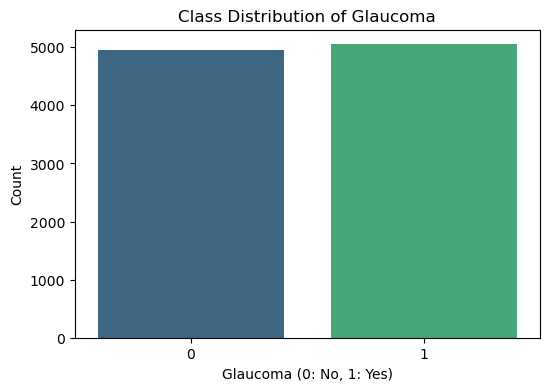

/var/folders/3r/n2wkqsjs6_zd4cxcxbsh4lmh0000gn/T/ipykernel_28046/3077790786.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=glaucoma_data, x='race', palette='viridis', order=['asian', 'black', 'white'])


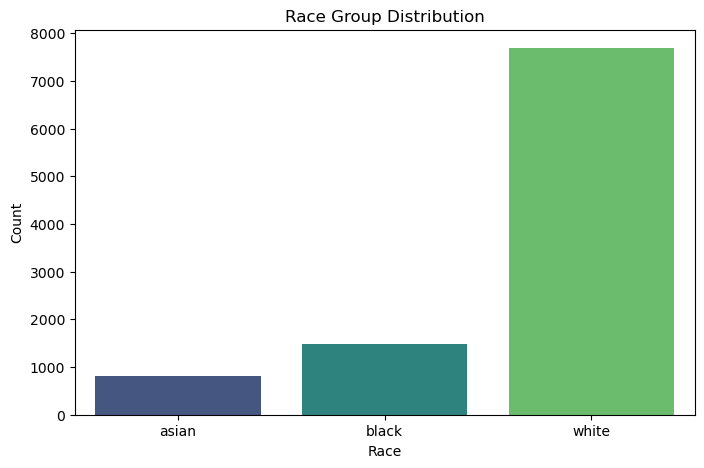

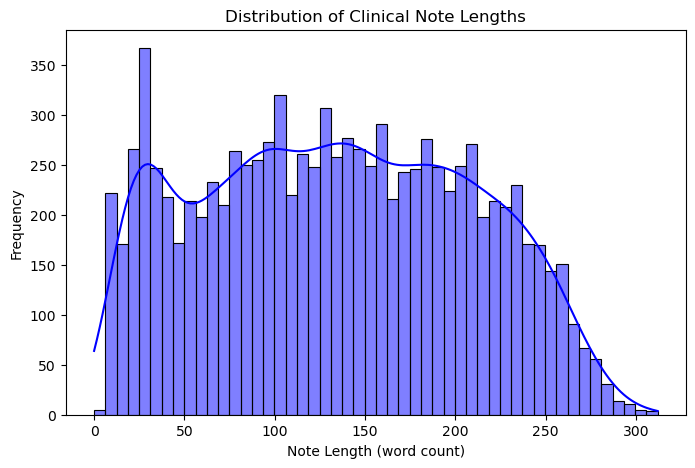

In [74]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=glaucoma_data, x='glaucoma', palette='viridis')
plt.title('Class Distribution of Glaucoma')
plt.xlabel('Glaucoma (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Race distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=glaucoma_data, x='race', palette='viridis', order=['asian', 'black', 'white'])
plt.title('Race Group Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Clinical note length distribution
glaucoma_data['note_length'] = glaucoma_data['note'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(glaucoma_data['note_length'], kde=True, bins=50, color='blue')
plt.title('Distribution of Clinical Note Lengths')
plt.xlabel('Note Length (word count)')
plt.ylabel('Frequency')
plt.show()

In [75]:
# Tokenization and padding
MAX_WORDS = 10000  # Maximum number of unique tokens
MAX_SEQ_LENGTH = 300  # Maximum sequence length for padding

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(glaucoma_data['note'])

sequences = tokenizer.texts_to_sequences(glaucoma_data['note'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH, padding='post', truncating='post')

In [76]:
# Prepare target and subgroup labels
labels = glaucoma_data['glaucoma'].values
race_labels = pd.get_dummies(glaucoma_data['race']).values

# Train-test split based on `use` column
from sklearn.model_selection import train_test_split

# Stratified train-test split to ensure representation of both classes in the test set
X_train, X_test, y_train, y_test, race_train, race_test = train_test_split(
    padded_sequences, labels, race_labels, 
    test_size=0.4,  # Increase test size to 40%
    stratify=labels, 
    random_state=42
)

In [77]:
positive_indices = np.where(labels == 1)[0]

# Manually select some positive samples for the test set
test_positive_indices = positive_indices[:10]  # Select 10 positive samples
test_negative_indices = np.where(labels == 0)[0][:2000 - len(test_positive_indices)]  # Select remaining negatives

# Create the test set manually
test_indices = np.concatenate([test_positive_indices, test_negative_indices])
train_indices = np.setdiff1d(np.arange(len(labels)), test_indices)

# Split the data manually
X_train, X_test = padded_sequences[train_indices], padded_sequences[test_indices]
y_train, y_test = labels[train_indices], labels[test_indices]
race_train, race_test = race_labels[train_indices], race_labels[test_indices]
print(X_test)

[[ 729    5   20 ...    0    0    0]
 [ 304   11  352 ...    0    0    0]
 [  26 1108   22 ...    0    0    0]
 ...
 [  16   59  299 ...    0    0    0]
 [  24   69  280 ...    0    0    0]
 [ 650   23   18 ...    0    0    0]]


In [78]:
print("Training Data Distribution:")
print(pd.Series(y_train).value_counts())

Training Data Distribution:
1    5038
0    2962
Name: count, dtype: int64


In [79]:
print("Overall Dataset Distribution:")
print(pd.Series(labels).value_counts())

Overall Dataset Distribution:
1    5048
0    4952
Name: count, dtype: int64


In [80]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=50)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [81]:
races = ['asian', 'black', 'white']
for race in races:
    # Find subgroup samples for the given race
    positive_indices = glaucoma_data[
        (glaucoma_data['race'].str.lower() == race) & (glaucoma_data['glaucoma'] == 1)
    ].index.to_numpy()  # Convert to numpy array
    
    negative_indices = glaucoma_data[
        (glaucoma_data['race'].str.lower() == race) & (glaucoma_data['glaucoma'] == 0)
    ].index.to_numpy()  # Convert to numpy array
    
    # Ensure subgroup has both positive and negative samples in the test set
    test_positive_indices = positive_indices[:5]  # Adjust number as needed
    test_negative_indices = negative_indices[:10]  # Adjust number as needed
    
    # Combine selected subgroup indices
    subgroup_test_indices = np.concatenate([test_positive_indices, test_negative_indices])

    # Ensure these indices are added to the current test set
    current_test_indices = np.arange(len(X_test))  # Assume X_test is numpy array or similar
    final_test_indices = np.concatenate([current_test_indices, subgroup_test_indices])

    # Update the test set
    X_test = padded_sequences[final_test_indices]
    y_test = labels[final_test_indices]
    race_test = race_labels[final_test_indices]

In [82]:
print("New Overall Test Set Distribution:")
print(pd.Series(y_test).value_counts())

print("\nNew Subgroup Distributions:")
races = ['asian', 'black', 'white']
for i, race in enumerate(races):
    subgroup_indices = np.where(race_test[:, i] == 1)[0]
    print(f"{race.capitalize()} group:")
    print(pd.Series(y_test[subgroup_indices]).value_counts())

New Overall Test Set Distribution:
1    1054
0     991
Name: count, dtype: int64

New Subgroup Distributions:
Asian group:
1    87
0    79
Name: count, dtype: int64
Black group:
1    197
0     94
Name: count, dtype: int64
White group:
0    818
1    770
Name: count, dtype: int64


In [83]:
# Check shapes
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (10076, 300) (10076,)


In [84]:
print("Testing set shape:", X_test.shape, y_test.shape)

Testing set shape: (2045, 300) (2045,)


In [85]:
# ===== Model Building =====
def build_model(model_type='LSTM'):
    model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_SEQ_LENGTH)
    ])
    if model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=False))
    elif model_type == 'GRU':
        model.add(GRU(64, return_sequences=False))
    elif model_type == 'CNN':
        model.add(Conv1D(64, kernel_size=5, activation='relu'))
        model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

In [86]:
def evaluate_model(model_type):
    print(f"\nTraining {model_type} model...")
    model = build_model(model_type)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, verbose=1)
    
    # Overall AUC
    y_pred = model.predict(X_test).ravel()
    try:
        overall_auc = roc_auc_score(y_test, y_pred)
        print(f"Overall AUC: {overall_auc:.4f}")
    except ValueError as e:
        print(f"Overall AUC cannot be calculated: {e}")
        overall_auc = None
    
    # Subgroup AUCs
    subgroup_aucs = {}
    races = ['asian', 'black', 'white']
    for i, race in enumerate(races):
        subgroup_indices = np.where(race_test[:, i] == 1)[0]
        try:
            if len(np.unique(y_test[subgroup_indices])) < 2:
                raise ValueError(f"Not enough classes for AUC calculation in {race} group.")
            subgroup_auc = roc_auc_score(y_test[subgroup_indices], y_pred[subgroup_indices])
            subgroup_aucs[race] = subgroup_auc
            print(f"AUC for {race.capitalize()} group: {subgroup_auc:.4f}")
        except ValueError as e:
            print(f"AUC for {race.capitalize()} group cannot be calculated: {e}")
            subgroup_aucs[race] = None
    
    return overall_auc, subgroup_aucs, history

In [87]:
print("Overall Test Set Distribution:")
print(pd.Series(y_test).value_counts())

print("\nSubgroup Distributions:")
races = ['asian', 'black', 'white']
for i, race in enumerate(races):
    subgroup_indices = np.where(race_test[:, i] == 1)[0]
    print(f"{race.capitalize()} group:")
    print(pd.Series(y_test[subgroup_indices]).value_counts())

Overall Test Set Distribution:
1    1054
0     991
Name: count, dtype: int64

Subgroup Distributions:
Asian group:
1    87
0    79
Name: count, dtype: int64
Black group:
1    197
0     94
Name: count, dtype: int64
White group:
0    818
1    770
Name: count, dtype: int64


In [88]:
# Evaluate all models
for model_type in ['LSTM', 'GRU', 'CNN']:
    print(f"\nEvaluating {model_type} model...")
    overall_auc, subgroup_aucs, history = evaluate_model(model_type)
    
    print(f"\n{model_type} Model Evaluation:")
    
    # Check if overall_auc is None
    if overall_auc is not None:
        print(f"Overall AUC: {overall_auc:.4f}")
    else:
        print("Overall AUC: Not defined (only one class present in y_test).")
    
    # Handle subgroup AUCs
    for race, auc in subgroup_aucs.items():
        if auc is not None:
            print(f"AUC for {race.capitalize()} group: {auc:.4f}")
        else:
            print(f"AUC for {race.capitalize()} group: Not defined (only one class present in subgroup).")


Evaluating LSTM model...

Training LSTM model...
Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


315/315 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - AUC: 0.5122 - loss: 0.6932 - val_AUC: 0.5009 - val_loss: 0.6942
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - AUC: 0.4950 - loss: 0.6937 - val_AUC: 0.4986 - val_loss: 0.6934
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - AUC: 0.4917 - loss: 0.6941 - val_AUC: 0.4996 - val_loss: 0.6929
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - AUC: 0.4804 - loss: 0.6941 - val_AUC: 0.5005 - val_loss: 0.6936
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - AUC: 0.5000 - loss: 0.6936 - val_AUC: 0.5010 - val_loss: 0.6936
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Overall AUC: 0.4997
AUC for Asian group: 0.5172
AUC for Black group: 0.4974
AUC for White group: 0.4983

LSTM Model Evaluation:
Overall AUC: 0.4997
AUC for Asian group: 0.5172
AUC for Black group: 0.4974
AUC for White group: 0.4983

Evaluating GRU model...

Training GRU model...
Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


315/315 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - AUC: 0.5009 - loss: 0.6937 - val_AUC: 0.4995 - val_loss: 0.6927
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 238s 759ms/step - AUC: 0.4917 - loss: 0.6941 - val_AUC: 0.5004 - val_loss: 0.6949
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - AUC: 0.4984 - loss: 0.6934 - val_AUC: 0.5005 - val_loss: 0.6929
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - AUC: 0.5003 - loss: 0.6937 - val_AUC: 0.5009 - val_loss: 0.6931
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - AUC: 0.4948 - loss: 0.6935 - val_AUC: 0.5009 - val_loss: 0.6929
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Overall AUC: 0.5043
AUC for Asian group: 0.5000
AUC for Black group: 0.5025
AUC for White group: 0.5052

GRU Model Evaluation:
Overall AUC: 0.5043
AUC for Asian group: 0.5000
AUC for Black group: 0.5025
AUC for White group: 0.5052

Evaluating CNN model...

Training CNN model...
Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - AUC: 0.6608 - loss: 0.6318 - val_AUC: 0.8788 - val_loss: 0.4382
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - AUC: 0.8989 - loss: 0.4016 - val_AUC: 0.9102 - val_loss: 0.4053
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - AUC: 0.9526 - loss: 0.2802 - val_AUC: 0.9302 - val_loss: 0.3540
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - AUC: 0.9763 - loss: 0.1986 - val_AUC: 0.9353 - val_loss: 0.4029
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - AUC: 0.9882 - loss: 0.1390 - val_AUC: 0.9357 - val_loss: 0.4588
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Overall AUC: 0.9359
AUC for Asian group: 0.9486
AUC for Black group: 0.9394
AUC for White group: 0.9354

CNN Model Evaluation:
Overall AUC: 0.9359
AUC for Asian group: 0.9486
AUC for Black group: 0.9394
AUC for White group: 0.9354
